<a href="https://colab.research.google.com/github/iamBHK/DiabetesPrediction/blob/main/Diabetes_Pred_by_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deep-forest
!pip install opencv-python
!pip install tensorflow==2.7.0

     |████████████████████████████████| 2.4 MB 4.3 MB/s 
     |████████████████████████████████| 14.8 MB 30.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |█                               | 15.5 MB 3.7 MB/s eta 0:02:09

In [97]:
from deepforest import CascadeForestClassifier
from keras.models import Sequential
from keras.models import model_from_json
from keras.callbacks import TensorBoard
from keras import optimizers
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import model_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.metrics import accuracy_score
import seaborn as sns

In [132]:
df = pd.read_csv ('diabetes.csv',encoding='utf-8')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [228]:
X =df[['Pregnancies',	'Glucose'	,'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age',	'Outcome']]
dim=X.shape[1]

In [156]:
x_train=[]

for i in X:
  x_train.append(i)

x_test=[]

for i in X[:100:]:
  x_test.append(i)

In [157]:
train_x=np.array(x_train)
test_x=np.array(x_test)

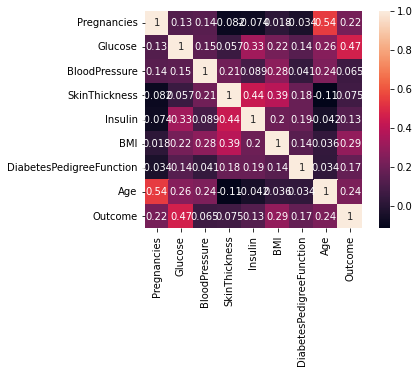

<Figure size 4608x4608 with 0 Axes>

In [210]:
foo = sns.heatmap(X.corr(), vmax=1, square=True, annot=True)
plt.figure(figsize=(64,64))
X=X.to_numpy()
Y= df[['Outcome']] # 2D
Y=Y.to_numpy()
t1=Y.shape[0]
Y=np.reshape(Y,(t1,))  # 2D
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.02)

In [211]:
x_train=np.array(x_train)
y_test=np.array(y_test)

In [212]:
print(y_train.shape,y_test.shape)

(752,) (16,)


In [213]:
print(x_train.shape,x_test.shape)

(752, 9) (16, 9)


In [214]:
y_train2=tf.keras.utils.to_categorical(y_train)
print(y_train2.shape)
category=2      
y_test2=tf.keras.utils.to_categorical(y_test, num_classes=(category))

(752, 2)


In [215]:
#DF Model
model = CascadeForestClassifier()
#We can import saved model using "model.load('classifier')"
model.fit(x_train, y_train)


[2022-04-21 02:23:15.175] Start to fit the model:
[2022-04-21 02:23:15.175] Fitting cascade layer = 0 
[2022-04-21 02:23:15.776] layer = 0  | Val Acc = 100.000 % | Elapsed = 0.600 s
[2022-04-21 02:23:15.778] Fitting cascade layer = 1 
[2022-04-21 02:23:16.354] layer = 1  | Val Acc = 100.000 % | Elapsed = 0.575 s
[2022-04-21 02:23:16.356] Early stopping counter: 1 out of 2
[2022-04-21 02:23:16.358] Fitting cascade layer = 2 
[2022-04-21 02:23:16.906] layer = 2  | Val Acc = 100.000 % | Elapsed = 0.548 s
[2022-04-21 02:23:16.906] Early stopping counter: 2 out of 2
[2022-04-21 02:23:16.906] Handling early stopping
[2022-04-21 02:23:16.907] The optimal number of layers: 1


In [216]:
ypred = model.predict(x_train)

[2022-04-21 02:23:16.920] Start to evalute the model:
[2022-04-21 02:23:16.922] Evaluating cascade layer = 0 


In [217]:
acc=accuracy_score(ypred,y_train)
print(acc)

1.0


In [218]:
print("Test Accuracy: {:.2f}%".format(acc * 100))

Test Accuracy: 100.00%


In [219]:
acty = pd.DataFrame(y_test,columns=['values'])
predyy = pd.DataFrame(ypred,columns=['values'])

In [225]:
from sklearn.metrics import classification_report, log_loss, accuracy_score, confusion_matrix
print(classification_report(y_train, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       1.00      1.00      1.00       260

    accuracy                           1.00       752
   macro avg       1.00      1.00      1.00       752
weighted avg       1.00      1.00      1.00       752



In [226]:
cf_matrix = confusion_matrix(y_train, ypred, normalize='true')

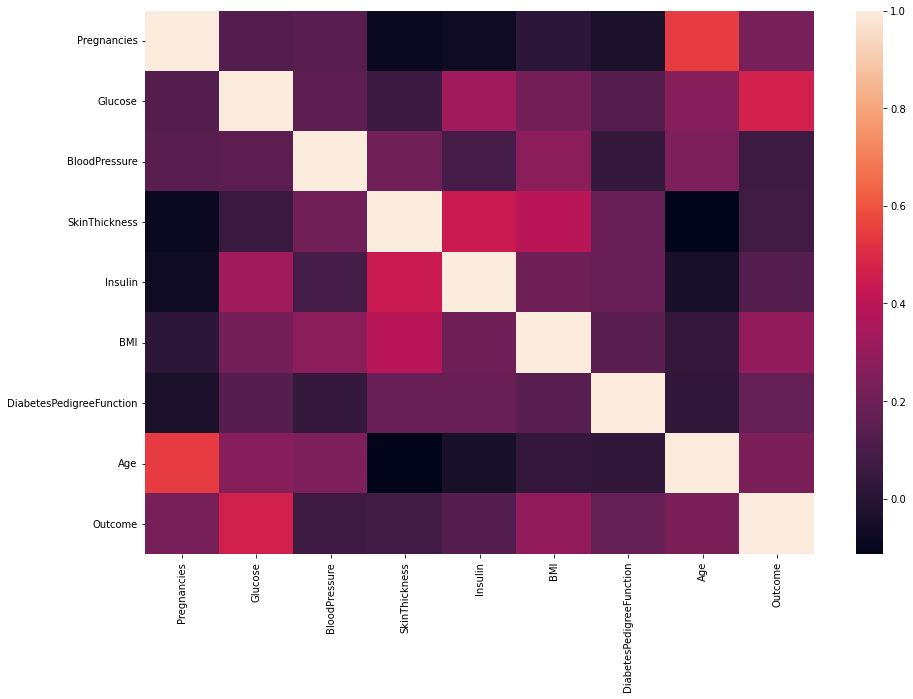

In [229]:
plt.figure(figsize = (15,10))
sns.heatmap(X.corr(), vmax=1)
plt.show()

In [231]:
acty = pd.DataFrame(y_train,columns=['values'])
predyy = pd.DataFrame(ypred,columns=['values'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


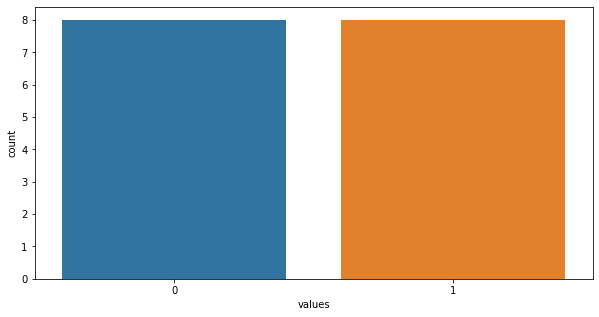

In [220]:
plt.figure(figsize=(10,5))
sns.countplot(acty['values'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


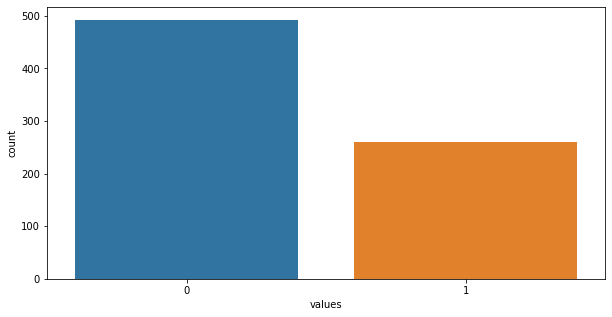

In [241]:
plt.figure(figsize=(10,5))
sns.countplot(predyy['values'])
plt.show()

In [238]:
#Once this model is created with this name, if you want to save again you should rename "DiabetesPrediction_DF"
#model.save('DiabetesPrediction_DF1B')

In [239]:
os.listdir()
#See our model is saved in current directory. We can use this model using keras model "tf.saved_model.load"

['.config',
 'DiabetesPrediction_DF1B',
 'DiabetesPrediction_DF',
 'diabetes.csv',
 'DiabetesClassification',
 'sample_data']